In [1]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler

#
# Getting the data

In [2]:
# Get the data
df = data('titanic')

# unique values
print('class: {}'.format(df['class'].unique()))
print('age: {}'.format(df['age'].unique()))
print('sex: {}'.format(df['sex'].unique()))

# pick a random sample
display(df.sample(5))

class: ['1st class' '2nd class' '3rd class']
age: ['adults' 'child']
sex: ['man' 'women']


,class,age,sex,survived
564,2nd class,adults,women,yes
182,1st class,adults,women,yes
98,1st class,adults,man,no
1201,3rd class,adults,women,no
1058,3rd class,adults,man,no


# 
# One Hot Encoding
Another way to do the One Hot Encoder is by using the method ```.get_dummies(df)``` of pandas, as the exemple: ```df = pd.get_dummies(df, drop_first=True).astype(int)```.

In [3]:
# One Hot Enconding from scratch
df['class'] = df['class'].replace('1st class', 0)
df['class'] = df['class'].replace('2nd class', 1)
df['class'] = df['class'].replace('3rd class', 2)

df['age'] = df['age'].replace('adults', 0)
df['age'] = df['age'].replace('child', 1)

df['age'] = df['age'].replace('child', 0)
df['age'] = df['age'].replace('adults', 1)

df['survived'] = df['survived'].replace('no', 0)
df['survived'] = df['survived'].replace('yes', 1)

df.sample(5)

,class,age,sex,survived
1054,2,0,man,0
627,2,0,man,1
791,2,0,man,0
120,0,0,man,0
23,0,0,man,1


# Data augmentation

0    817
1    499
Name: count, dtype: int64

<Axes: >

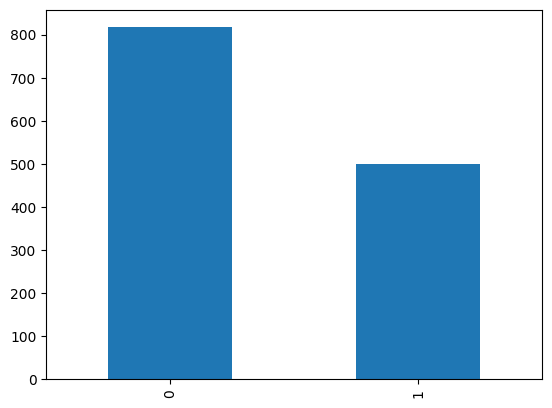

In [5]:
# One Hot Enconding
df = pd.get_dummies(df, drop_first=True).astype(int)

X = np.array(df.drop('survived', axis=1))
y = np.array(df['survived'])

display(pd.Series(y).value_counts())
pd.Series(y).value_counts().plot.bar()

1    817
0    817
Name: count, dtype: int64

<Axes: >

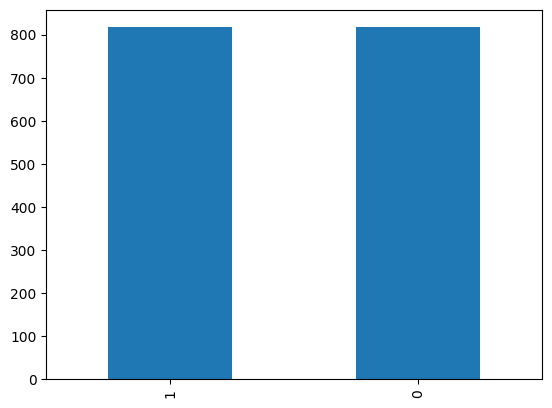

In [6]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

display(pd.Series(y_smote).value_counts())
pd.Series(y_smote).value_counts().plot.bar()

#
# Split the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#
# Train the model

In [8]:
# train
model = LogisticRegression()
model.fit(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

#
# Predictions

In [9]:
# Predictions
print('classe-1 child girl:  ', model.predict(np.array([[0, 1, 1]]))[0])
print('class-3 adult-age male:  ', model.predict(np.array([[2, 0, 0]]))[0])

classe-1 child girl:   1
class-3 adult-age male:   0


#
# Scoring
Another way to do the validation is by using a code like the exemplo bellow:
```
predictions = (model.predict(X_test) > .5).astype(int)
np.sum(predictions == y_test) / len(y_test)
```

In [10]:
# scoring the model
print(f'model: {100 * round(model.score(X_test, y_test), 3)}%')
print(f'model_smote: {100 * round(model_smote.score(X_test_smote, y_test_smote), 3)}%')


model: 79.5%
model_smote: 72.5%


#
# Comparing different optimizers (solvers)

In [11]:
# different types of optimizers
model_lbfgs = LogisticRegression(solver='lbfgs')
model_newton_cg = LogisticRegression(solver='newton-cg')
model_liblinear = LogisticRegression(solver='liblinear')
model_sag = LogisticRegression(solver='sag')
model_saga = LogisticRegression(solver='saga')

# training the models
model_lbfgs.fit(X_smote, y_smote)
model_newton_cg.fit(X_smote, y_smote)
model_liblinear.fit(X_smote, y_smote)
model_sag.fit(X_smote, y_smote)
model_saga.fit(X_smote, y_smote)

# predictions
lbfgs = model_lbfgs.score(X_test_smote, y_test_smote)
newton_cg = model_newton_cg.score(X_test_smote, y_test_smote)
liblinear = model_liblinear.score(X_test_smote, y_test_smote)
sag = model_sag.score(X_test_smote, y_test_smote)
saga = model_saga.score(X_test_smote, y_test_smote)

print('lbfgs: ', lbfgs)
print('newton_cg: ', newton_cg)
print('newton_cg: ', liblinear)
print('newton_cg: ', sag)
print('newton_cg: ', saga)

lbfgs:  0.7247706422018348
newton_cg:  0.7247706422018348
newton_cg:  0.7247706422018348
newton_cg:  0.7247706422018348
newton_cg:  0.7247706422018348
